## EJERCICIO MÓDULO 3

* m1_python/m1_nombre_apellido.ipynb
* m2_numpy/m2_nombre_apellido.ipynb
* m3_datascience/m3_nombre_apellido.ipynb
* m4_sql/m4_nombre_apellido.ipynb + sql

Slack poner nombre y apellido, foto.



## EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 

    * Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro

Domingo 19/01 23:59 fecha entrega.

* m3_nombre_apellido.ipynb




### Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import plotly # Para ver la versión
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
# Suprimir todas las advertencias
warnings.simplefilter("ignore")



In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"plotly=={plotly.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==1.26.4
pandas==2.2.2
plotly==5.24.1
seaborn==0.13.2


## Parte 1: Carga y Limpieza

### Adquisición de datos

In [3]:
# Rutas del proyecto
Path = '..\\Data'

In [4]:
try:
    df = pd.read_csv((Path) + '\\diamonds.CSV')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.ParserError:
    print("Error al parsear el archivo CSV.")

In [5]:
# Tamaño de los datos
print("Forma del conjunto de datos: ", df.shape)


Forma del conjunto de datos:  (53940, 10)


In [6]:
# Observación de los datos
# Ver los tipos de datos
print(df.dtypes)
print("===================================================")
# Obtener un resumen más detallado
print(df.info())


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price       object
x           object
y          float64
z          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB
None


### Limpieza de valores error: 
#### Hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan

In [7]:
# Identificar las columnas con el signo ?
for columna in df.columns:
    if (df[columna] == '?').sum() > 0:
        print(f"La columna '{columna}' contiene valores '?'")

La columna 'cut' contiene valores '?'
La columna 'color' contiene valores '?'
La columna 'price' contiene valores '?'
La columna 'x' contiene valores '?'


In [8]:
# Reemplazar '?' en 'cut' por NaN
df['cut'] = df['cut'].replace('?', np.nan)

# Reemplazar '?' en 'color' por NaN
df['color'] = df['color'].replace('?', np.nan)

# Reemplazar '?' en 'price' por NaN
df['price'] = df['price'].replace('?', np.nan)

# Reemplazar '?' en 'x' por NaN
df['x'] = df['x'].replace('?', np.nan)



In [9]:
# # Verificar si los valores '?' han sido reemplazados
print(df.isna().sum())  # Muestra el conteo de valores NaN por columna

carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


### Limpieza de nulos (limpiar valores NaN):
#### Nulos en columnas continuas: media.
#### Nulos en columnas categóricas: moda.

In [10]:
# Obtener la media para los valores numéricops y la moda para los no numéricos, para reemplazarlos por los nan
# Calcular la media de las columnas numéricas
media_carat = df['carat'].mean()
media_depth = df['depth'].mean()
media_table = df['table'].mean()
media_y = df['y'].mean()
media_z = df['z'].mean()

# Remplazar los NaN en las columnas numéricas por la media
df['carat'].fillna(media_carat, inplace=True)
df['depth'].fillna(media_depth, inplace=True)
df['table'].fillna(media_table, inplace=True)
df['y'].fillna(media_y, inplace=True)
df['z'].fillna(media_z, inplace=True)

# Calcular la moda de las columnas no numéricas
moda_cut = df['cut'].mode()[0]  # Obtener el primer valor de la moda
moda_color = df['color'].mode()[0]
moda_clarity = df['clarity'].mode()[0]
moda_price = df['price'].mode()[0]  # Obtener el primer valor de la moda
moda_x = df['x'].mode()[0]

# Remplazar los NaN en las columnas no numéricas por la moda
df['cut'].fillna(moda_cut, inplace=True)
df['color'].fillna(moda_color, inplace=True)
df['clarity'].fillna(moda_clarity, inplace=True)
df['price'].fillna(moda_price, inplace=True)
df['x'].fillna(moda_x, inplace=True)

# Convertir los tipos de datos (verifica que los tipos sean correctos)
df = df.astype({
    'carat': 'float32',
    'cut': 'category',
    'color': 'category',
    'clarity': 'category',
    'depth': 'float64',
    'table': 'float64',
    'price': 'int64',  # Asegúrate de que 'price' sea numérico
    'x': 'float64',  # Asegúrate de que 'x' sea numérico
    'y': 'float64',
    'z': 'float64'
})


In [11]:
# Tipos de datos
print(df.dtypes)

carat       float32
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [12]:
# Suma de valopres nulos
print(df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [13]:
# Verificar duplicados
print("Duplicados df: ", df.duplicated().sum())


Duplicados df:  146


In [14]:
# Identificar las filas duplicadas (considerando todas las columnas)
duplicados = df.duplicated()

# Crear un nuevo DataFrame con los registros duplicados
df_duplicados = df[duplicados]

# Eliminar los registros duplicados del DataFrame original (manteniendo la primera ocurrencia)
df = df.drop_duplicates()

# Verificar los resultados
print("DataFrame original (sin duplicados):")
print(df.head(5))

print("\nDataFrame con los duplicados:")
print(df_duplicados.head(5))


DataFrame original (sin duplicados):
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

DataFrame con los duplicados:
      carat    cut color clarity  depth  table  price     x     y     z
1005   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008   0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025   1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28


In [15]:
df.head(5)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [16]:
# Valores únicos 'cut'
unique_cut = df['cut'].unique()
print("Valores únicos 'cut':", unique_cut)

# Valores únicos 'color'
unique_color = df['color'].unique()
print("Valores únicos 'color':", unique_color)

# Valores únicos 'clarity'
unique_clarity = df['clarity'].unique()
print("Valores únicos 'clarity':", unique_clarity)

Valores únicos 'cut': ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
Valores únicos 'color': ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
Valores únicos 'clarity': ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [17]:
# Definimos un diccionario para mapear los valores de 'cut'
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

# Definimos un diccionario para mapear los valores de 'color' 
color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1} 

# Definimos un diccionario para mapear los valores de 'clarity'
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8} 


In [18]:
def encode_data(df):
    """
    Esta función aplica el encoding a las columnas 'cut', 'color' y 'clarity' 

    Args:
        df: El DataFrame de entrada.

    Returns:
        Un nuevo DataFrame con las columnas codificadas.
    """

    df_encoded = df.copy()  # Creamos una copia del DataFrame original

    # Aplicamos el encoding utilizando el método map()
    df_encoded['cut_encoded'] = df_encoded['cut'].map(cut_mapping)
    df_encoded['color_encoded'] = df_encoded['color'].map(color_mapping)
    df_encoded['clarity_encoded'] = df_encoded['clarity'].map(clarity_mapping)

    # Creamos la columna 'is_ideal' directamente
    df_encoded['is_ideal'] = (df_encoded['cut'] == 'Ideal').astype(int)
    
    # Calculamos el volumen del diamante
    df_encoded['volume'] = df_encoded['x'] * df_encoded['y'] * df_encoded['z']

    # Creamos una columna que indica si el diamante es grande o pequeño
    df_encoded['size'] = df_encoded['carat'].apply(lambda x: 'Grande' if x >= 0.5 else 'Pequeño')

    # Creamos columnas indicadoras para la columna 'size'
    df_encoded = pd.get_dummies(df_encoded, columns=['size'], prefix='is_')

    # Creamos la columna de precio con IVA
    df_encoded['price_iva'] = df_encoded['price'] * 1.21
    
    

    return df_encoded



In [19]:
df_encoded = encode_data(df)

# Verificar el DataFrame con las nuevas columnas
print(df_encoded.head(5))


   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  cut_encoded color_encoded clarity_encoded  is_ideal     volume  is__Grande  \
0           5             6               2         1  38.202030       False   
1           4             6               3         0  34.505856       False   
2           2             6               5         0  38.076885       False   
3           4             2               4         0  46.724580       False   
4           2             1               2         0  51.917250       False   

   is__Pequeño  price_iva  
0         True     394.46  
1         True    

## Parte 2: Transformaciones

In [20]:
# Creamos la columna de descuento basada en condiciones
def aplicar_descuento(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.9  # 10% de descuento
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85  # 15% de descuento
    else:
        return row['price']



In [21]:
df_encoded['price_discount'] = df_encoded.apply(aplicar_descuento, axis=1)

df_encoded.head(5)

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  cut_encoded color_encoded clarity_encoded  is_ideal     volume  is__Grande  \
0           5             6               2         1  38.202030       False   
1           4             6               3         0  34.505856       False   
2           2             6               5         0  38.076885       False   
3           4             2               4         0  46.724580       False   
4           2             1               2         0  51.917250       False   

   is__Pequeño  price_iva  price_discount  
0         True     394.46           293.4  
1         True     394.46           326.0  
2         True     395.67           327.0  
3         True     404.14           334.0  
4         True     405.35           335.0

In [22]:
# Ordenar por 'cut' en orden ascendente y luego por 'price' en orden descendente
df_ordenado = df_encoded.sort_values(by=['cut', 'price'], ascending=[True, False])

df_ordenado.head(5)

carat   cut color clarity  depth  table  price      x      y     z  \
27646   2.01  Fair     G     SI1   70.6   64.0  18574   7.43   6.64  4.69   
27643   2.02  Fair     H     VS2   64.5   57.0  18565   8.00   7.95  5.14   
27630   4.50  Fair     J      I1   65.8   58.0  18531  10.23  10.16  6.72   
27623   2.00  Fair     G     VS2   67.6   58.0  18515   7.65   7.61  5.16   
27543   2.51  Fair     H     SI2   64.7   57.0  18308   8.44   8.50  5.48   

      cut_encoded color_encoded clarity_encoded  is_ideal      volume  \
27646           1             4               3         0  231.382088   
27643           1             3               4         0  326.904000   
27630           1             1               1         0  698.455296   
27623           1             4               4         0  300.397140   
27543           1             3               2         0  393.135200   

       is__Grande  is__Pequeño  price_iva  price_discount  
27646        True        False   22474.54         18574.0  
27643        True        False   22463.65         18565.0  
27630        True        False   22422.51         18531.0  
27623        True        False   22403.15         18515.0  
27543        True        False   22152.68         18308.0

In [23]:
# Agrupar por 'cut', 'color' y 'clarity' y calcular estadísticas
grouped = df_encoded.groupby(['cut', 'color', 'clarity'])
grouped_stats = grouped.agg({'price': ['mean', 'max', 'min'],
                            'carat': ['mean', 'max', 'min'],
                            'depth': ['mean', 'max', 'min']})

# Renombrar las columnas para mayor claridad (opcional)
grouped_stats.columns = ['price_mean', 'price_max', 'price_min', 'carat_mean', 'carat_max', 'carat_min', 'depth_mean', 'depth_max', 'depth_min']

print(grouped_stats.head(5))


                     price_mean  price_max  price_min  carat_mean  carat_max  \
cut  color clarity                                                             
Fair D     I1       7383.000000    15964.0     2491.0    1.877500       3.40   
           IF       1619.666667     2211.0     1208.0    0.380000       0.47   
           SI1      4273.344828    16386.0      644.0    0.913793       2.02   
           SI2      4355.142857    16086.0      536.0    1.016964       2.07   
           VS1      2921.200000     7083.0      563.0    0.630000       1.00   

                    carat_min  depth_mean  depth_max  depth_min  
cut  color clarity                                               
Fair D     I1            0.91   65.600000       66.8       64.7  
           IF            0.30   60.766667       61.2       60.5  
           SI1           0.40   64.634483       70.6       52.2  
           SI2           0.30   64.703571       71.6       55.5  
           VS1           0.25   63.160000  

## Parte 3: Distribuciones

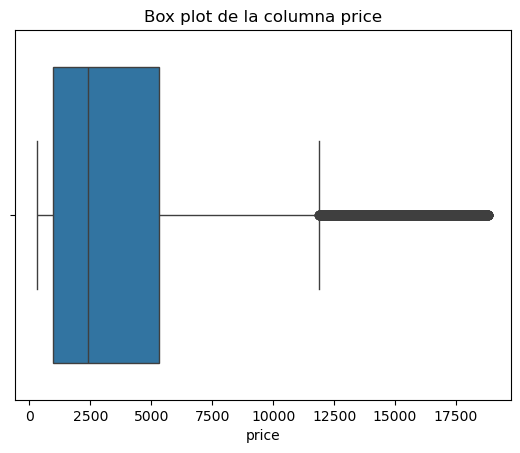

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  cut_encoded color_encoded clarity_encoded  is_ideal     volume  is__Grande  \
0           5             6               2         1  38.202030       False   
1           4             6               3         0  34.505856       False   
2           2             6               5         0  38.076885       False   
3           4             2               4         0  46.724580       False   
4           2             1               2         0  51.917250       False   

   is__Pequeño  price_iva  price_discount  
0         True     394.46     

In [24]:
# Calcular Q1, Q3 y IQR para la columna 'price'
Q1 = df_encoded['price'].quantile(0.25)
Q3 = df_encoded['price'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de Tukey
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_encoded[(df_encoded['price'] < lower_bound) | (df_encoded['price'] > upper_bound)]

# Crear un nuevo DataFrame sin outliers
df_sin_outliers = df_encoded[(df_encoded['price'] >= lower_bound) & (df_encoded['price'] <= upper_bound)]

# Visualizar con un box plot
sns.boxplot(x=df['price'])
plt.title('Box plot de la columna price')
plt.show()

# Visualizar el DataFrame sin outliers (opcional)
print(df_sin_outliers.head(5))


In [25]:
# Calcular asimetría y curtosis para la columna 'price'
print("Asimetría de 'price':", df_encoded['price'].skew())
print("Curtosis de 'price':", df_encoded['price'].kurt())


Asimetría de 'price': 1.6182419709544085
Curtosis de 'price': 2.178550453531282


In [26]:
# Transformación logarítmica
df_encoded['price_log'] = np.log(df_encoded['price'])

# Transformación de raíz cuadrada
df_encoded['price_sqrt'] = np.sqrt(df_encoded['price'])

df_encoded.head(5)

carat      cut color clarity  depth  table  price     x     y     z  ...  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43  ...   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31  ...   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31  ...   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63  ...   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75  ...   

  color_encoded clarity_encoded is_ideal     volume  is__Grande  is__Pequeño  \
0             6               2        1  38.202030       False         True   
1             6               3        0  34.505856       False         True   
2             6               5        0  38.076885       False         True   
3             2               4        0  46.724580       False         True   
4             1               2        0  51.917250       False         True   

   price_iva  price_discount  price_log  price_sqrt  
0     394.46           293.4   5.786897   18.055470  
1     394.46           326.0   5.786897   18.055470  
2     395.67           327.0   5.789960   18.083141  
3     404.14           334.0   5.811141   18.275667  
4     405.35           335.0   5.814131   18.303005  

[5 rows x 21 columns]

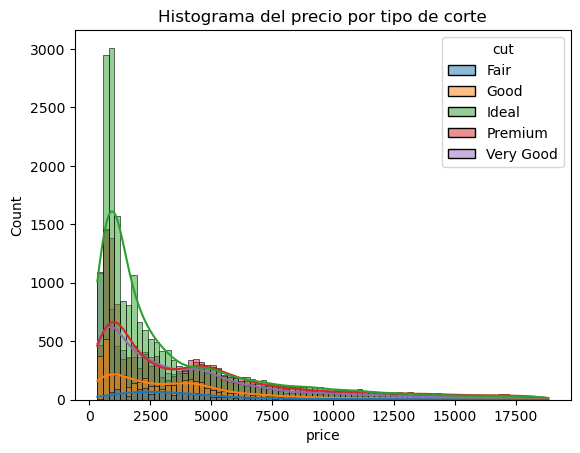

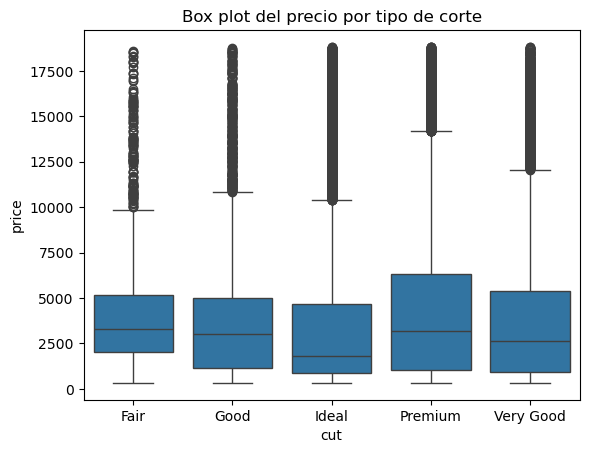

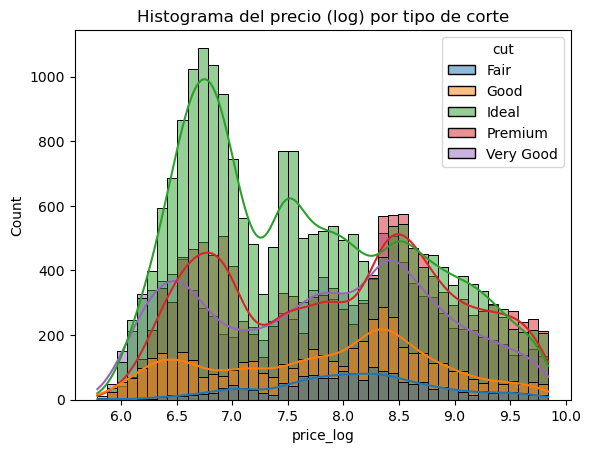

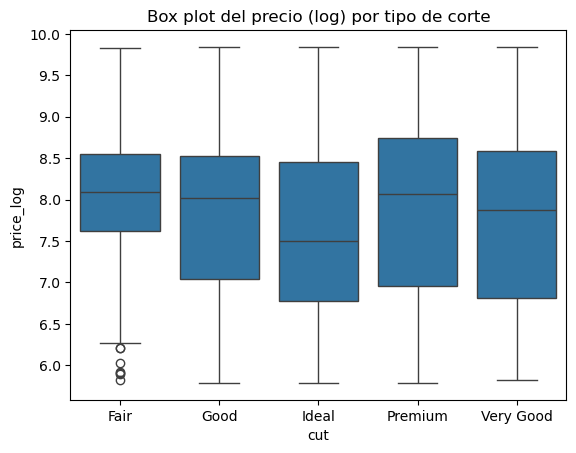

In [27]:
# Histograma y box plot para el precio original
sns.histplot(data=df_encoded, x='price', hue='cut', kde=True)
plt.title('Histograma del precio por tipo de corte')
plt.show()

sns.boxplot(x='cut', y='price', data=df_encoded)
plt.title('Box plot del precio por tipo de corte')
plt.show()

# Histograma y box plot para el precio transformado logarítmicamente
sns.histplot(data=df_encoded, x='price_log', hue='cut', kde=True)
plt.title('Histograma del precio (log) por tipo de corte')
plt.show()

sns.boxplot(x='cut', y='price_log', data=df_encoded)
plt.title('Box plot del precio (log) por tipo de corte')
plt.show()



In [28]:
# Discretizar la columna 'price' en categorías
bins = [0, 1000, 2000, np.inf]  
labels = ['Barato', 'Medio', 'Caro']
df_encoded['price_category'] = pd.cut(df_encoded['price'], bins=bins, labels=labels)

df_encoded.head(5)

carat      cut color clarity  depth  table  price     x     y     z  ...  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43  ...   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31  ...   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31  ...   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63  ...   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75  ...   

  clarity_encoded is_ideal     volume  is__Grande  is__Pequeño  price_iva  \
0               2        1  38.202030       False         True     394.46   
1               3        0  34.505856       False         True     394.46   
2               5        0  38.076885       False         True     395.67   
3               4        0  46.724580       False         True     404.14   
4               2        0  51.917250       False         True     405.35   

   price_discount  price_log  price_sqrt  price_category  
0           293.4   5.786897   18.055470          Barato  
1           326.0   5.786897   18.055470          Barato  
2           327.0   5.789960   18.083141          Barato  
3           334.0   5.811141   18.275667          Barato  
4           335.0   5.814131   18.303005          Barato  

[5 rows x 22 columns]

## Parte 4: Visualizaciones

#### Visualizaciones Univariantes
#### Histogramas y curvas de densidad:

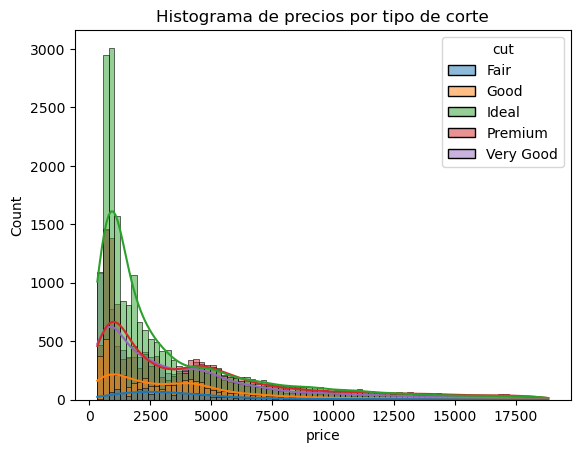

In [29]:
# Crea un histograma que muestra la distribución de los precios para cada tipo de corte, 
# y añade una curva de densidad para una mejor visualización.

sns.histplot(data=df_encoded, x='price', hue='cut', kde=True)
plt.title('Histograma de precios por tipo de corte')
plt.show()

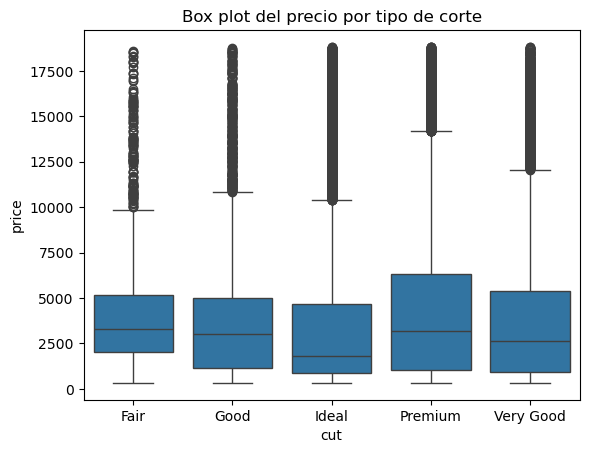

In [30]:
# Un box plot es útil para visualizar la distribución, los cuartiles y los outliers de una variable numérica para diferentes categorías.

sns.boxplot(x='cut', y='price', data=df_encoded)
plt.title('Box plot del precio por tipo de corte')
plt.show()

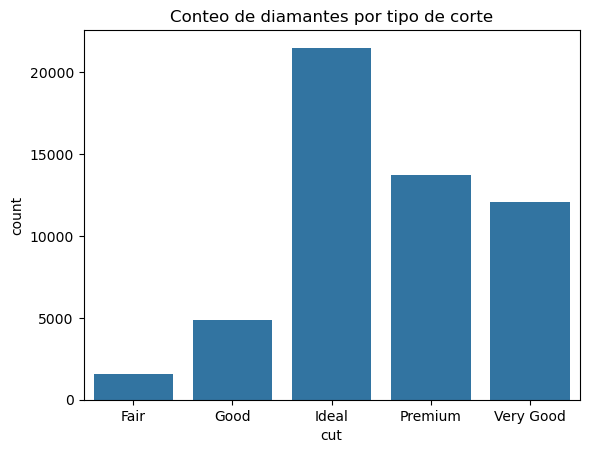

In [31]:
# Un countplot muestra la frecuencia de cada categoría en una variable categórica

sns.countplot(x='cut', data=df_encoded)
plt.title('Conteo de diamantes por tipo de corte')
plt.show()

#### Visualizaciones Bivariantes y Multivariantes

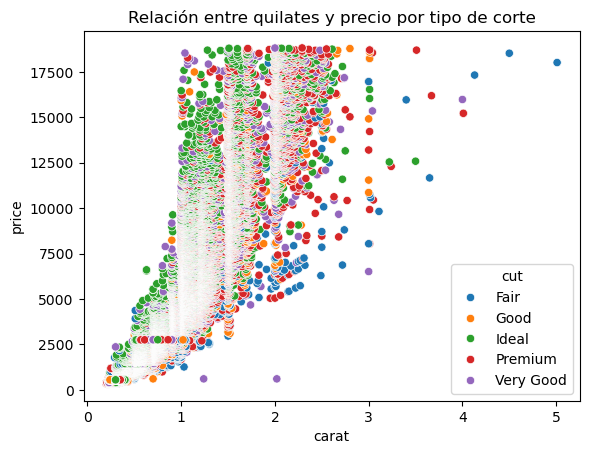

In [32]:
# Scatterplot: Este gráfico muestra la relación entre dos variables numéricas, 
# coloreando los puntos según una variable categórica.


sns.scatterplot(data=df_encoded, x='carat', y='price', hue='cut')
plt.title('Relación entre quilates y precio por tipo de corte')
plt.show()

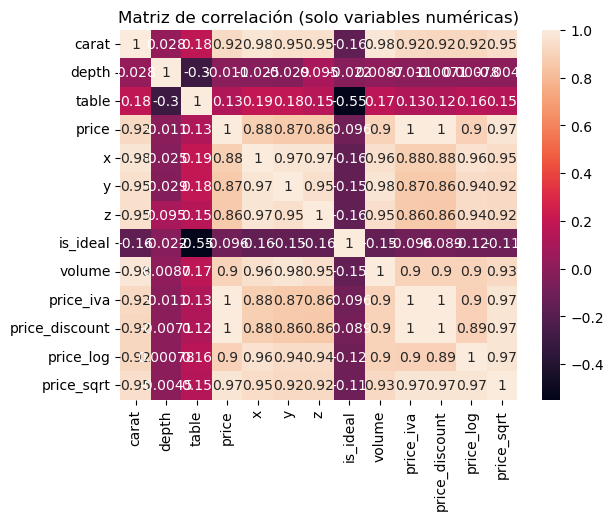

In [33]:
# Correlación: Calcula la matriz de correlación entre todas las variables numéricas 
# y la visualiza en un mapa de calor.

# Seleccionar solo las columnas numéricas
numeric_cols = df_encoded.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las columnas numéricas
corr_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()


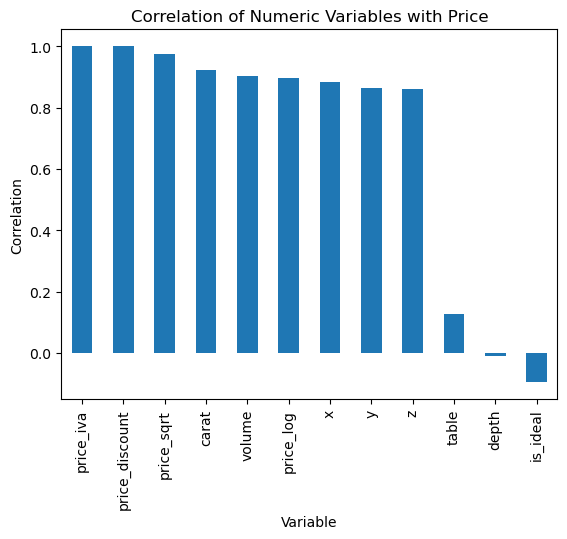

In [34]:
# Gráfico de barras para correlación: Muestra la correlación de cada variable numérica 
# con el precio en un gráfico de barras.

# Seleccionar solo las columnas numéricas
numeric_cols = df_encoded.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las columnas numéricas
corr_with_price = numeric_cols.corr()['price']

# Ordenar y eliminar pricwe para una mejor visualizacióm
corr_with_price = corr_with_price.sort_values(ascending=False).drop('price')

# Plot de correlación como un bar chart
corr_with_price.plot(kind='bar')
plt.title('Correlation of Numeric Variables with Price')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()


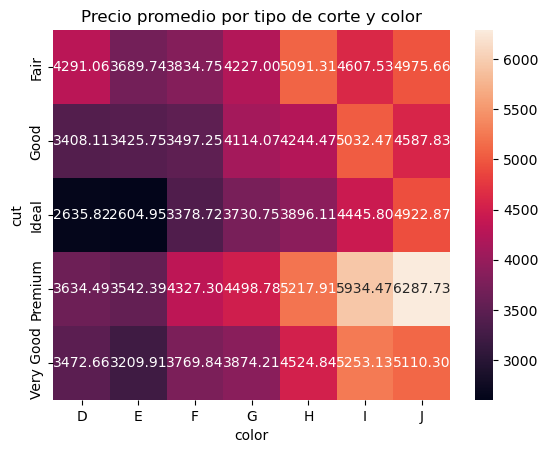

In [35]:
# Pivot table y heatmap: Crea una tabla pivot que muestra el precio promedio 
# para cada combinación de 'cut' y 'color', y luego lo visualiza en un mapa de 
# calor.

pivot_table = df_encoded.pivot_table(values='price', index='cut', columns='color', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title('Precio promedio por tipo de corte y color')
plt.show()


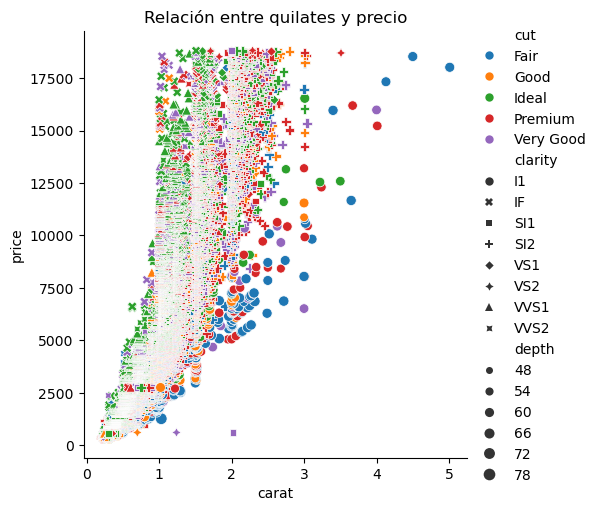

In [36]:
# Combinando visualizaciones con `relplot: Este gráfico muestra la relación entre 
# el quilate y el precio, utilizando el color para representar el tipo de corte, el 
# estilo para representar la claridad y el tamaño de los puntos para representar la 
# profundidad.

sns.relplot(x='carat', y='price', hue='cut', style='clarity', size='depth', data=df_encoded)
plt.title('Relación entre quilates y precio')
plt.show()
  

#### Filtrando los datos

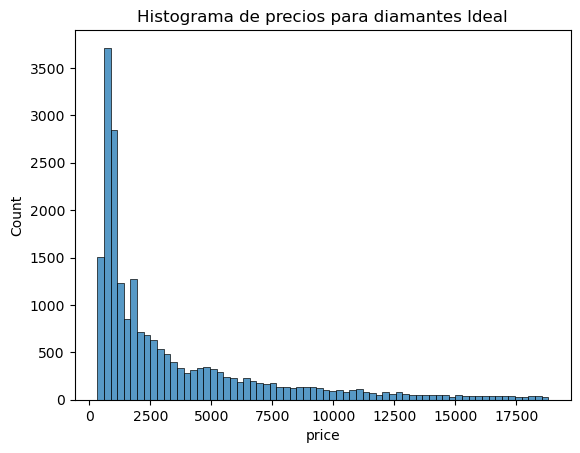

In [37]:
# Filtrar por una condición:

df_filtered = df_encoded[df_encoded['cut'] == 'Ideal']
sns.histplot(data=df_filtered, x='price')
plt.title('Histograma de precios para diamantes Ideal')
plt.show()


In [38]:
# Gráficos 3D: Para datos con tres dimensiones numéricas,
fig = px.scatter_3d(df_encoded, x='carat', y='depth', z='price', color='cut')
fig.show()